# Ventilator Manufacturer Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Ventilator Manufacturer
symbols = ['MDT','RMD','AHPI']
start = '2019-12-01'
end = '2020-04-14'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

133

In [7]:
df.head()

,MDT,RMD,AHPI
Date,,,
2019-12-02,109.697014,148.676666,1.01
2019-12-03,109.776138,149.135651,1.08
2019-12-04,110.715752,149.814117,1.05
2019-12-05,110.972908,149.844055,1.05
2019-12-06,111.853165,150.253143,1.06


In [8]:
df.tail()

,MDT,RMD,AHPI
Date,,,
2020-04-06,94.089996,158.300003,18.440001
2020-04-07,94.459999,153.679993,16.900000
2020-04-08,99.279999,155.160004,17.150000
2020-04-09,101.029999,159.820007,16.650000
2020-04-13,99.519997,157.190002,15.680000


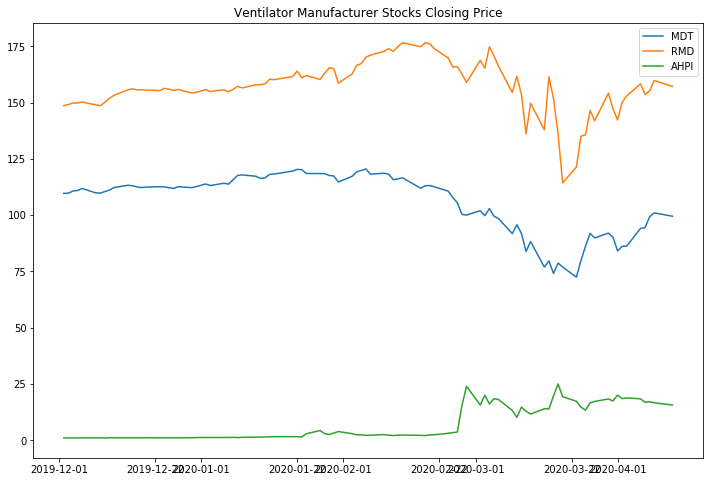

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Ventilator Manufacturer Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

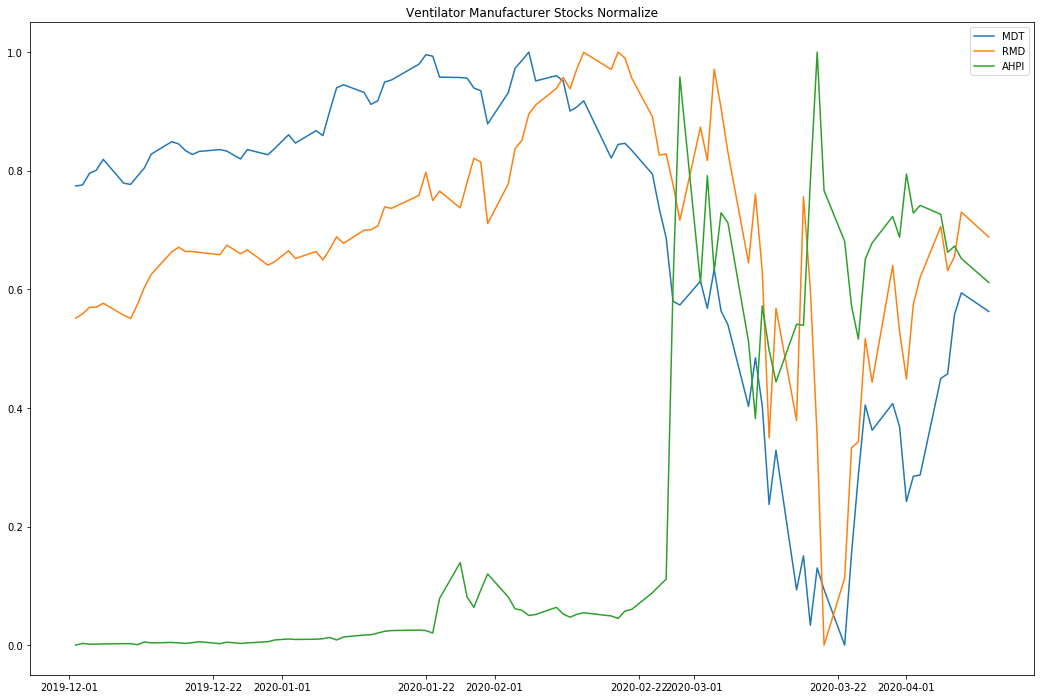

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Ventilator Manufacturer Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

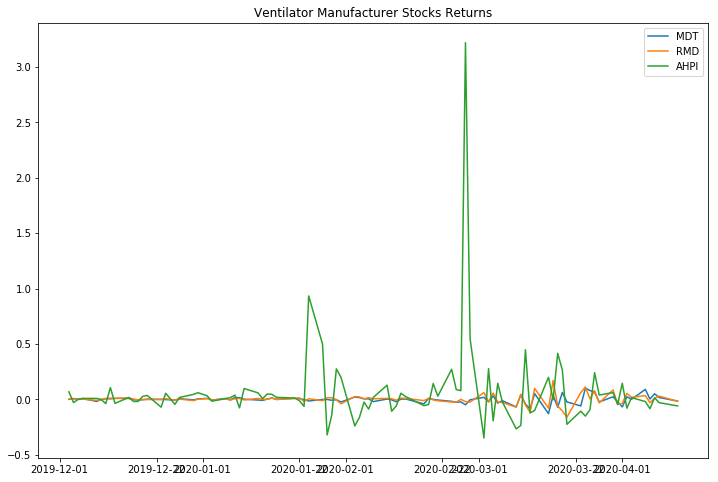

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Ventilator Manufacturer Stocks Returns')
plt.legend(labels=stock_rets.columns)

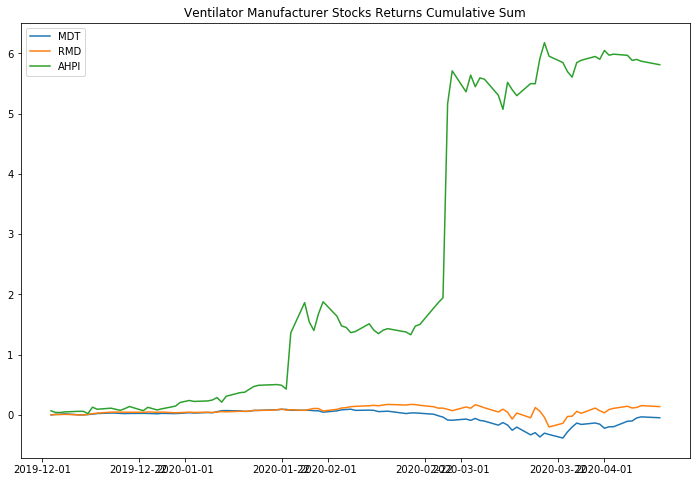

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Ventilator Manufacturer Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

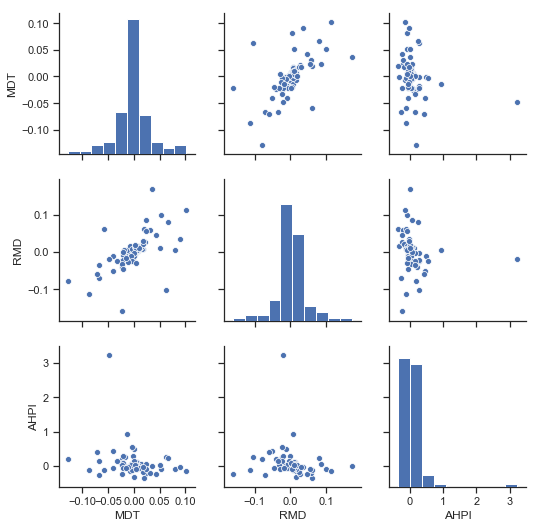

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

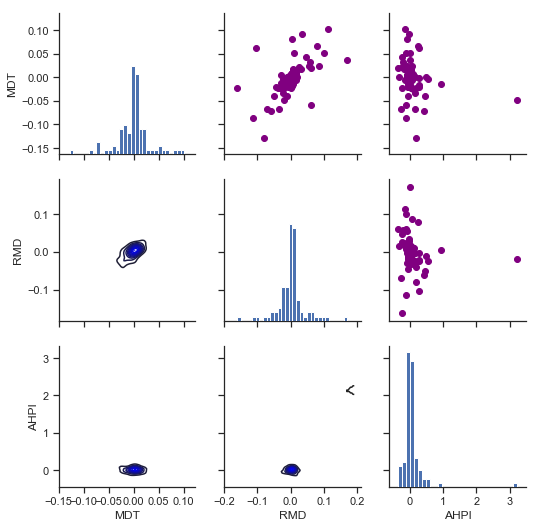

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

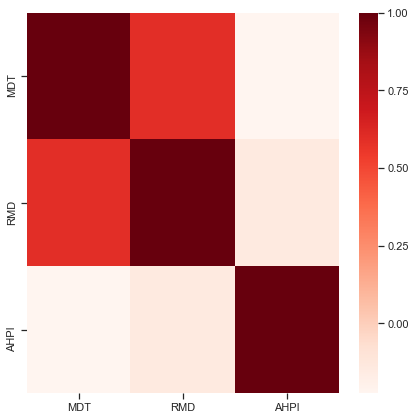

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

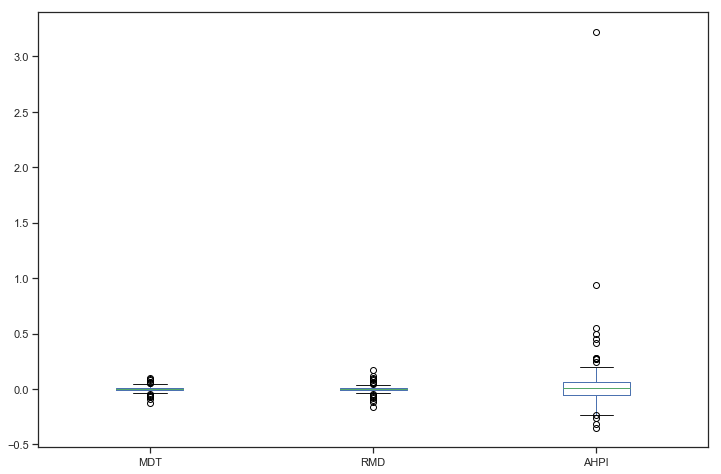

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

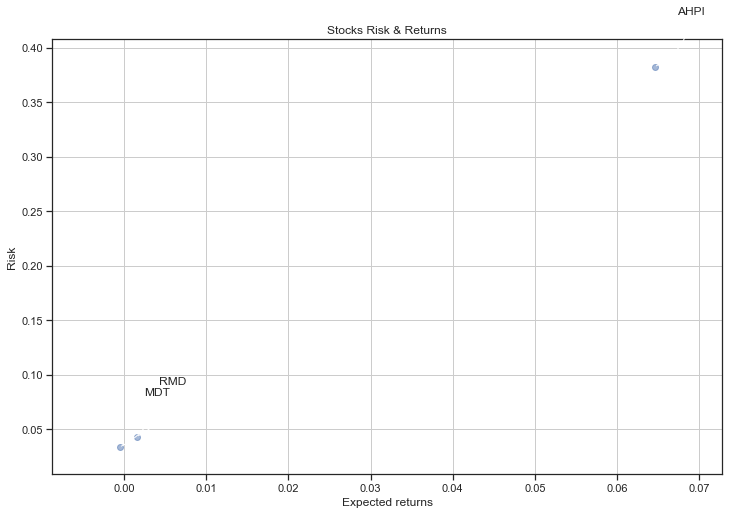

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

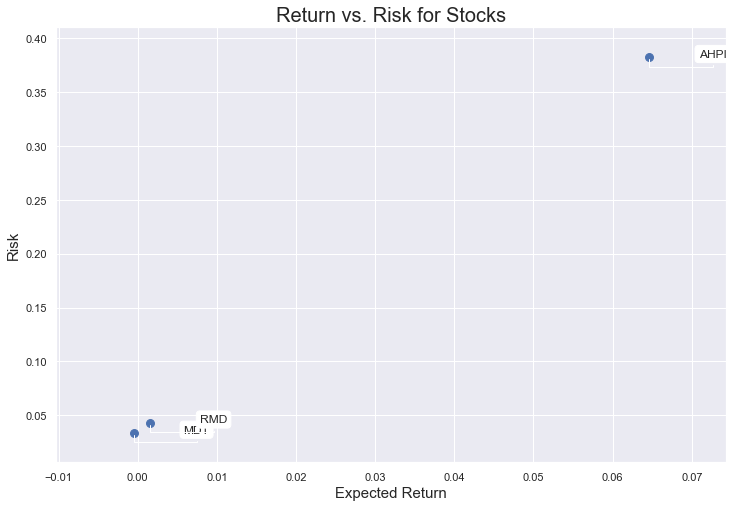

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

AHPI  AHPI    1.000000
RMD   RMD     1.000000
MDT   MDT     1.000000
RMD   MDT     0.594789
MDT   RMD     0.594789
AHPI  MDT     0.225555
MDT   AHPI    0.225555
AHPI  RMD     0.139522
RMD   AHPI    0.139522
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,MDT,RMD,AHPI
Date,,,
2019-12-03,0.560373,0.493460,0.117023
2019-12-04,0.594432,0.497888,0.089793
2019-12-05,0.567331,0.484718,0.097584
2019-12-06,0.591707,0.492379,0.100255
2019-12-09,0.481927,0.458577,0.100230


In [23]:
Normalized_Value.corr()

,MDT,RMD,AHPI
MDT,1.000000,0.594789,-0.225555
RMD,0.594789,1.000000,-0.139522
AHPI,-0.225555,-0.139522,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

AHPI  AHPI    1.000000
RMD   RMD     1.000000
MDT   MDT     1.000000
RMD   MDT     0.594789
MDT   RMD     0.594789
AHPI  MDT     0.225555
MDT   AHPI    0.225555
AHPI  RMD     0.139522
RMD   AHPI    0.139522
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
MDT    -0.000514
RMD     0.001543
AHPI    0.064549
dtype: float64
--------------------------------------------------
Stock risks:
MDT     0.033714
RMD     0.043191
AHPI    0.382719
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
MDT,-0.000514,0.033714
RMD,0.001543,0.043191
AHPI,0.064549,0.382719


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
MDT,-0.000514,0.033714
RMD,0.001543,0.043191
AHPI,0.064549,0.382719


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
MDT,-0.000514,0.033714,-0.311864
RMD,0.001543,0.043191,-0.195799
AHPI,0.064549,0.382719,0.142529


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
MDT,-0.000514,0.033714,-0.311864,0.101893,-0.128237,0.001055,-1.494608
RMD,0.001543,0.043191,-0.195799,0.170376,-0.159883,0.002681,-1.645604
AHPI,0.064549,0.382719,0.142529,3.217391,-0.347917,0.011012,-5.825822


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
MDT,-0.000514,0.033714,-0.311864,0.101893,-0.128237,0.001055,-1.494608,-0.000113
RMD,0.001543,0.043191,-0.195799,0.170376,-0.159883,0.002681,-1.645604,-0.000125
AHPI,0.064549,0.382719,0.142529,3.217391,-0.347917,0.011012,-5.825822,-0.000451


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
MDT,-0.000514,0.033714,-0.311864,0.101893,-0.128237,0.001055,-1.494608,-0.000113,-0.168462
RMD,0.001543,0.043191,-0.195799,0.170376,-0.159883,0.002681,-1.645604,-0.000125,0.111268
AHPI,0.064549,0.382719,0.142529,3.217391,-0.347917,0.011012,-5.825822,-0.000451,179.583628


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AHPI,0.064549,0.382719,0.142529,3.217391,-0.347917,0.011012,-5.825822,-0.000451,179.583628
RMD,0.001543,0.043191,-0.195799,0.170376,-0.159883,0.002681,-1.645604,-0.000125,0.111268
MDT,-0.000514,0.033714,-0.311864,0.101893,-0.128237,0.001055,-1.494608,-0.000113,-0.168462
